# EDA

## Challenge 1

+ Forecast hourly energy offers for each of the power plant.

+ Your forecasts will cover the period from June 1, 2024, at 23:00 to June 29, 2024, at 23:00.


In [8]:
# importing the libs 

import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [9]:
# load the data

## This file contains historical data from around March to May 2024.
df_omie_labelled = pd.read_csv('../data/df_omie_labelled.csv')

# ---------------------
## Contains information on the technology type (Wind or Solar) for each plant, 
## which may be useful for grouping. 

df_filtered_cat = pd.read_csv('../data/filtered_categories.csv')

# ---------------------
## Additional information about generation units that you can use if needed.

df_unit_list = pd.read_csv('../data/unit_list.csv')

In [10]:
# ------Quick View at the df - df_omie_labelled --------------

print(f"The shape of the df is {df_omie_labelled.shape}")

print("----------------------------------------------")

print(f"The list of the cols in this df are {df_omie_labelled.columns}")

print("----------------------------------------------")

print(f"The head of the df is {df_omie_labelled.head()}")

print("----------------------------------------------")

print(f"The tail of the df is {df_filtered_cat.tail()}")

print("----------------------------------------------")

print("\nThe data types of the cols are \n", df_omie_labelled.dtypes)

print("----------------------------------------------")

print("The missing values in the df are \n", df_omie_labelled.isnull().sum())

print("----------------------------------------------")

print("The percentqge of missing values in the df are \n", df_omie_labelled.isnull().mean())

print("----------------------------------------------")

print("The unique values in the df are \n", df_omie_labelled.nunique())

The shape of the df is (2409526, 5)
----------------------------------------------
The list of the cols in this df are Index(['Codigo', 'Descripcion', 'fechaHora', 'PrecEuro', 'Energia'], dtype='object')
----------------------------------------------
The head of the df is     Codigo   Descripcion            fechaHora  PrecEuro  Energia
0  ADXRE01        PREAL1  2024-02-29 00:00:00       0.0      0.0
1  ADXVD03    PV ALARCOS  2024-02-29 00:00:00       0.0      0.0
2  ADXVD04  EOLICA AUDAX  2024-02-29 00:00:00      -0.1      2.7
3  AIRVD01       AIRVD01  2024-02-29 00:00:00       0.0      0.0
4  AIRVD02       AIRVD02  2024-02-29 00:00:00       0.0      0.0
----------------------------------------------
The tail of the df is      Categoria   Codigo
1292     Solar  WMVD209
1293     Solar  WMVD210
1294     Solar  WMVD211
1295     Solar  ZRMRE01
1296     Solar  ZRMRE03
----------------------------------------------

The data types of the cols are 
 Codigo          object
Descripcion     obje

Key Variables:

+ Codigo: A unique identifier for each power plant.
+ fechaHora: The timestamp for each offer.
+ PrecEuro: The price at which the energy is offered.
+ Energia: The total energy offered.

In [11]:
# ------Quick View at the dfs - df_filtered_cat--------------

print(f"The shape of the df is {df_filtered_cat.shape}")

print("----------------------------------------------")

print(f"The list of the cols in this df are {df_filtered_cat.columns}")

print("----------------------------------------------")

print(f"The head of the df is {df_filtered_cat.head()}")

print("----------------------------------------------")

print(f"The tail of the df is {df_filtered_cat.tail()}")

print("----------------------------------------------")

print("\nThe data types of the cols are \n", df_filtered_cat.dtypes)

print("----------------------------------------------")

print("The missing values in the df are \n", df_filtered_cat.isnull().sum())

print("----------------------------------------------")

print("The percentqge of missing values in the df are \n", df_filtered_cat.isnull().mean())

print("----------------------------------------------")

print("The unique values in the df are \n", df_filtered_cat.nunique())

The shape of the df is (1297, 2)
----------------------------------------------
The list of the cols in this df are Index(['Categoria', 'Codigo'], dtype='object')
----------------------------------------------
The head of the df is   Categoria   Codigo
0    Eolica  ADXVD04
1    Eolica  CEVD053
2    Eolica  CEVD054
3    Eolica  CEVD209
4    Eolica  CEVD234
----------------------------------------------
The tail of the df is      Categoria   Codigo
1292     Solar  WMVD209
1293     Solar  WMVD210
1294     Solar  WMVD211
1295     Solar  ZRMRE01
1296     Solar  ZRMRE03
----------------------------------------------

The data types of the cols are 
 Categoria    object
Codigo       object
dtype: object
----------------------------------------------
The missing values in the df are 
 Categoria    0
Codigo       0
dtype: int64
----------------------------------------------
The percentqge of missing values in the df are 
 Categoria    0.0
Codigo       0.0
dtype: float64
------------------------

In [12]:
# ------Quick View at the df - df_unit_list ---------------

print(f"The shape of the df is {df_unit_list.shape}")

print("----------------------------------------------")

print(f"The list of the cols in this df are {df_unit_list.columns}")

print("----------------------------------------------")

print(f"The head of the df is {df_unit_list.head()}")

print("----------------------------------------------")

print(f"The tail of the df is {df_unit_list.tail()}")

print("----------------------------------------------")

print("\nThe data types of the cols are \n", df_unit_list.dtypes)

print("----------------------------------------------")

print("The missing values in the df are \n", df_unit_list.isnull().sum())

print("----------------------------------------------")

print("The percentqge of missing values in the df are \n", df_unit_list.isnull().mean())

print("----------------------------------------------")

print("The unique values in the df are \n", df_unit_list.nunique())

The shape of the df is (3283, 7)
----------------------------------------------
The list of the cols in this df are Index(['Codigo', 'Descripción', 'Agente', 'Porcentaje_Propiedad',
       'Tipo_Unidad', 'Zona/Frontera', 'Tecnología'],
      dtype='object')
----------------------------------------------
The head of the df is     Codigo                    Descripción                          Agente  \
0  AFIBGEC          ALMACENAMIENTO COMPRA  IBERDROLA ENERGÍA ESPAÑA S..A.   
1  AFIBHEC  COMPRA HIBRIDACION EOLICA BAT  IBERDROLA ENERGÍA ESPAÑA S..A.   
2  AFIBHFC  COMPRA HIBRIDACION FV BATERIA  IBERDROLA ENERGÍA ESPAÑA S..A.   
3  ACAVADB               BOMBAS DO CAVADO           EDP GEM PORTUGAL S.A.   
4  ADOUROB                 BOMBA DO DOURO           EDP GEM PORTUGAL S.A.   

   Porcentaje_Propiedad     Tipo_Unidad    Zona/Frontera  \
0                 100.0  ALMACENAMIENTO    ZONA ESPAÑOLA   
1                 100.0  ALMACENAMIENTO    ZONA ESPAÑOLA   
2                 100.0  ALMAC

## EDA on each dataset

### 1. df_omie_labelled

The unique values in the df are: 
    
+ Codigo          1069
+ Descripcion     1044
+ fechaHora       2254
+ PrecEuro        1865
+ Energia        10916


In [13]:
df_omie_labelled.head()

,Codigo,Descripcion,fechaHora,PrecEuro,Energia
0,ADXRE01,PREAL1,2024-02-29 00:00:00,0.0,0.0
1,ADXVD03,PV ALARCOS,2024-02-29 00:00:00,0.0,0.0
2,ADXVD04,EOLICA AUDAX,2024-02-29 00:00:00,-0.1,2.7
3,AIRVD01,AIRVD01,2024-02-29 00:00:00,0.0,0.0
4,AIRVD02,AIRVD02,2024-02-29 00:00:00,0.0,0.0


In [14]:
df_omie_labelled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2409526 entries, 0 to 2409525
Data columns (total 5 columns):
 #   Column       Dtype  
---  ------       -----  
 0   Codigo       object 
 1   Descripcion  object 
 2   fechaHora    object 
 3   PrecEuro     float64
 4   Energia      float64
dtypes: float64(2), object(3)
memory usage: 91.9+ MB


In [15]:
df_omie_labelled.describe().T

,count,mean,std,min,25%,50%,75%,max
PrecEuro,2409526.0,1.908406,83.844819,-500.0,-0.1,0.0,0.0,3000.0
Energia,2409526.0,13.861352,72.123333,0.0,0.0,0.8,9.1,5047.0


+ PrecEuro has negative vals. 

In [16]:
df_omie_labelled['Codigo'].nunique()

1069

In [17]:
# 1. Converting the fechaHora to datetime

df_omie_labelled["fechaHora"] = pd.to_datetime(df_omie_labelled["fechaHora"])

date_range = df_omie_labelled["fechaHora"].min(), df_omie_labelled["fechaHora"].max()
print()
print("Date Range:", date_range)

df_omie_labelled["date"] = df_omie_labelled["fechaHora"].dt.date
df_omie_labelled["hour"] = df_omie_labelled["fechaHora"].dt.hour
df_omie_labelled["week"] = df_omie_labelled["fechaHora"].dt.isocalendar().week


Date Range: (Timestamp('2024-02-29 00:00:00'), Timestamp('2024-06-01 22:00:00'))


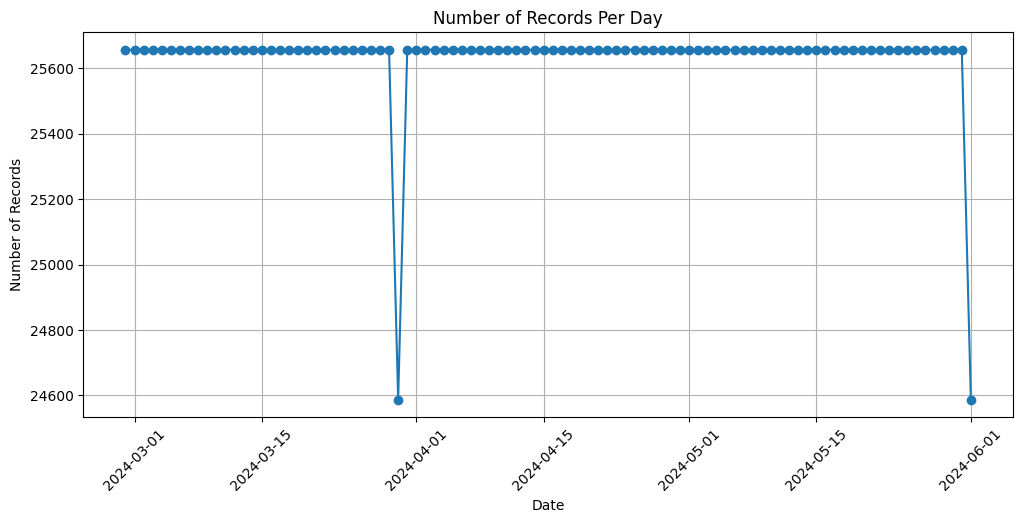

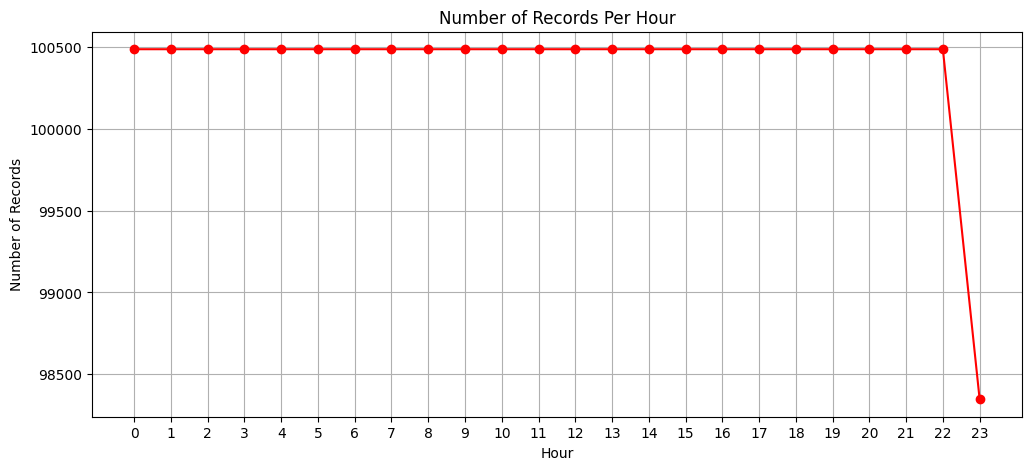

In [18]:
# Aggregations

# Daily counts

daily_counts = df_omie_labelled.groupby("date").size()


plt.figure(figsize=(12, 5))
plt.plot(daily_counts.index, daily_counts.values, marker="o", linestyle="-")
plt.xlabel("Date")
plt.ylabel("Number of Records")
plt.title("Number of Records Per Day")
plt.xticks(rotation=45)
plt.grid()
plt.show()

# Hourly counts
hourly_counts = df_omie_labelled.groupby("hour").size()

plt.figure(figsize=(12, 5))
plt.plot(hourly_counts.index, hourly_counts.values, marker="o", linestyle="-", color="red")
plt.xlabel("Hour")
plt.ylabel("Number of Records")
plt.title("Number of Records Per Hour")
plt.xticks(range(24))
plt.grid()
plt.show()

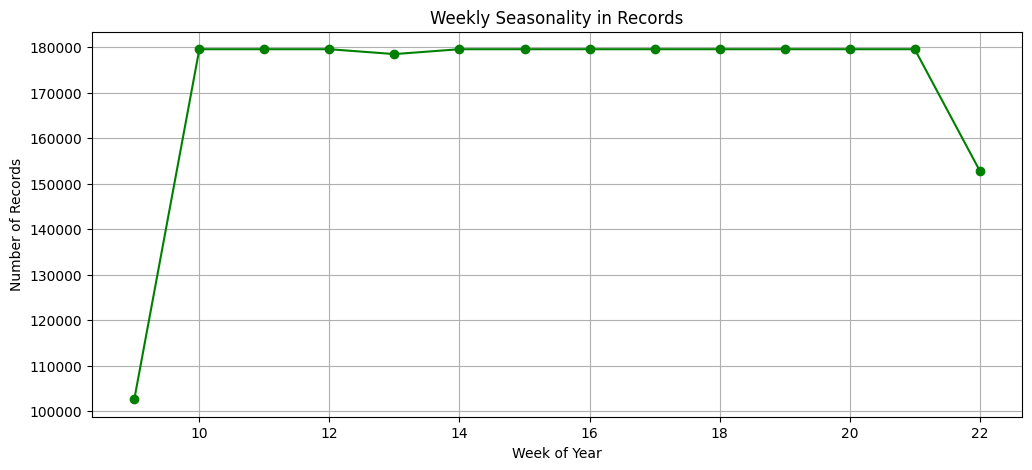

In [19]:
weekly_counts = df_omie_labelled.groupby("week").size()

# Plot weekly seasonality
plt.figure(figsize=(12, 5))
plt.plot(weekly_counts.index, weekly_counts.values, marker="o", linestyle="-", color="green")
plt.xlabel("Week of Year")
plt.ylabel("Number of Records")
plt.title("Weekly Seasonality in Records")
plt.grid()
plt.show()

In [20]:
# # Grouping by Codigo and fechaHora to analyze energy offers and prices

df_grouped = df_omie_labelled.groupby(["Codigo", df_omie_labelled["fechaHora"].dt.date]) \
    .agg({"PrecEuro": "mean", "Energia": "sum"}).reset_index()

df_grouped.head()

,Codigo,fechaHora,PrecEuro,Energia
0,ADXRE01,2024-02-29,0.0,0.0
1,ADXRE01,2024-03-01,0.0,0.0
2,ADXRE01,2024-03-02,0.0,0.0
3,ADXRE01,2024-03-03,0.0,0.0
4,ADXRE01,2024-03-04,0.0,0.0


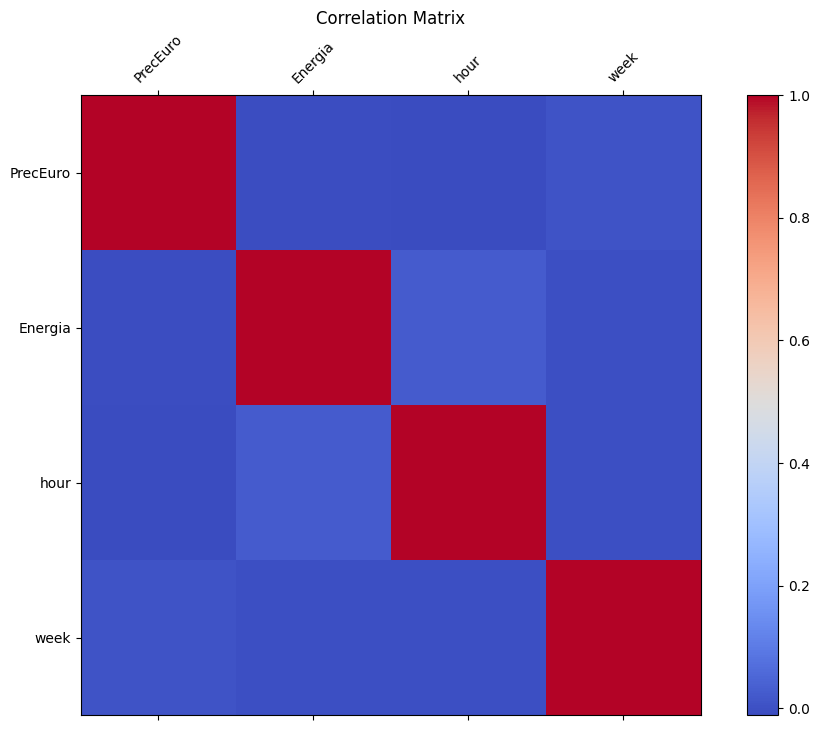

In [21]:
# correlation matrix 

numerical_cols = df_omie_labelled.select_dtypes(include=[np.number]).columns

corr_matrix = df_omie_labelled[numerical_cols].corr()

plt.figure(figsize=(12, 8))
plt.matshow(corr_matrix, cmap="coolwarm", fignum=1)
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Correlation Matrix")
plt.show()


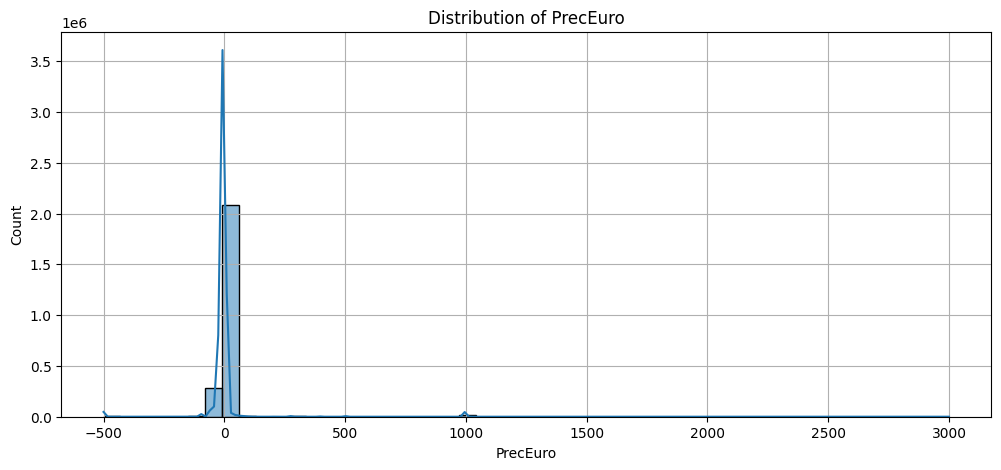

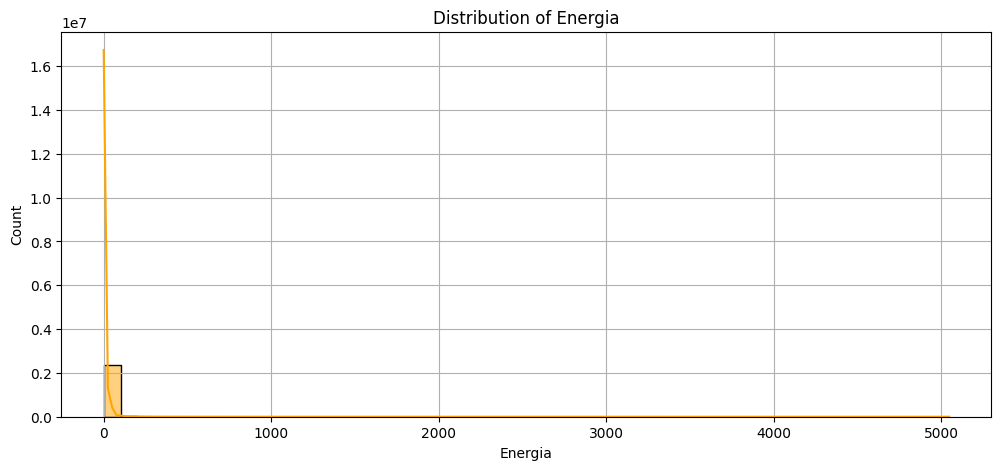

In [22]:
# Distribution and Outlier Analysis
# Histograms
plt.figure(figsize=(12, 5))
sns.histplot(df_omie_labelled["PrecEuro"], bins=50, kde=True)
plt.xlabel("PrecEuro")
plt.title("Distribution of PrecEuro")
plt.grid()
plt.show()

plt.figure(figsize=(12, 5))
sns.histplot(df_omie_labelled["Energia"], bins=50, kde=True, color="orange")
plt.xlabel("Energia")
plt.title("Distribution of Energia")
plt.grid()
plt.show()

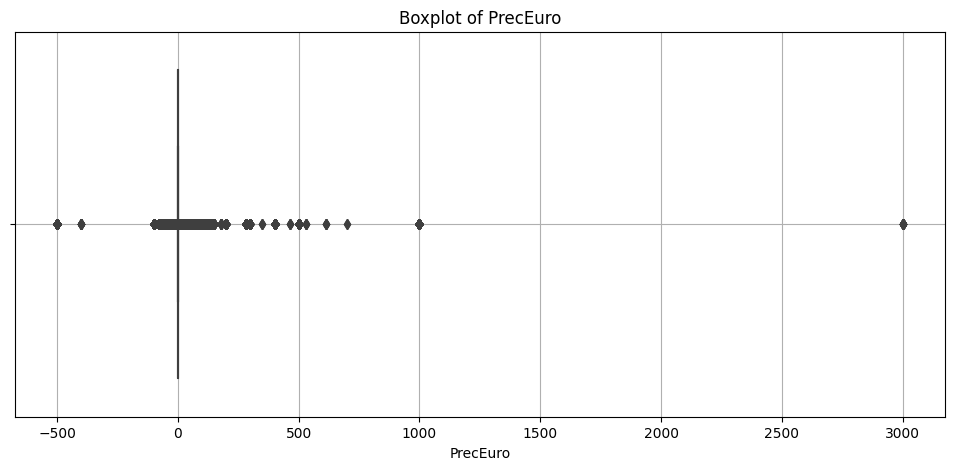

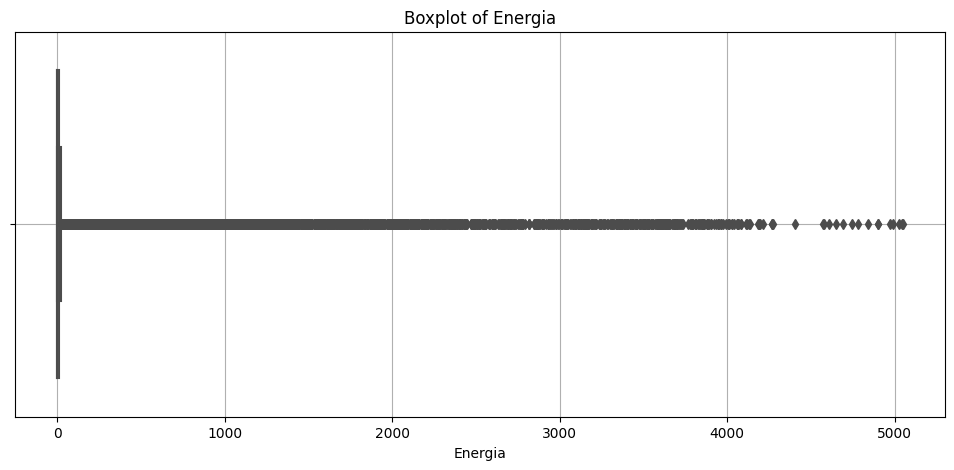

In [23]:
# Boxplots

plt.figure(figsize=(12, 5))
sns.boxplot(x=df_omie_labelled["PrecEuro"])
plt.title("Boxplot of PrecEuro")
plt.grid()
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x=df_omie_labelled["Energia"], color="orange")
plt.title("Boxplot of Energia")
plt.grid()
plt.show()


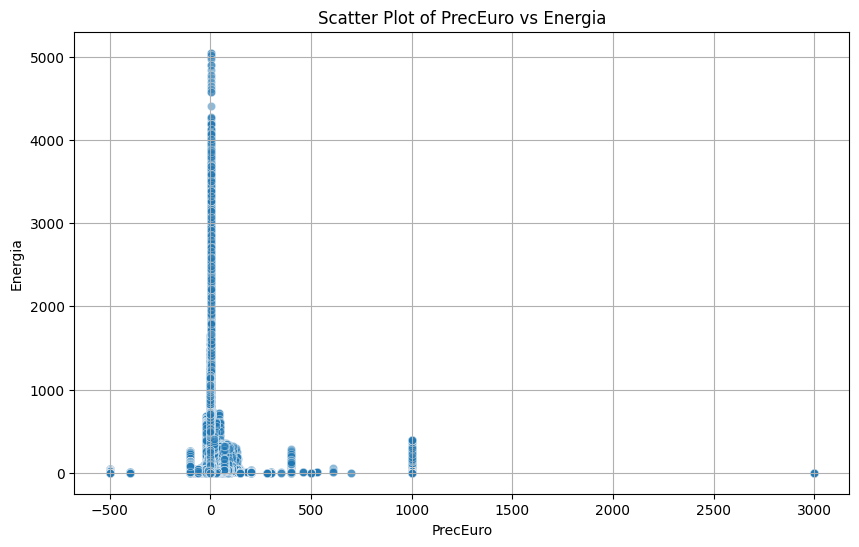

In [24]:
# Scatter plot to analyze relationship between PrecEuro and Energia
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df_omie_labelled["PrecEuro"], y=df_omie_labelled["Energia"], alpha=0.5)
plt.xlabel("PrecEuro")
plt.ylabel("Energia")
plt.title("Scatter Plot of PrecEuro vs Energia")
plt.grid()
plt.show()

### Aggregated Metrics by Plant:

In [25]:
df_aggregated = df_omie_labelled.groupby("Codigo").agg(
    avg_energy=("Energia", "mean"),
    total_bids=("Codigo", "count"),
    avg_price=("PrecEuro", "mean")
).reset_index()



In [26]:
print(df_aggregated.head())

print(df_aggregated.tail())


    Codigo  avg_energy  total_bids  avg_price
0  ADXRE01    0.898092        2254  -1.330967
1  ADXVD03   78.237178        2254 -32.326309
2  ADXVD04    7.770098        2254  -4.751331
3  AIRVD01    0.577817        2254   0.000000
4  AIRVD02    2.159494        2254   0.000000
       Codigo  avg_energy  total_bids  avg_price
1064  WMVD204    6.272760        2254  -0.118753
1065  WMVD206    1.152839        2254  -0.061393
1066  WMVD207    2.055989        2254  -2.047436
1067  ZRMRE01    0.284472        2254  -1.251109
1068  ZRMRE03    0.004170        2254  12.511091


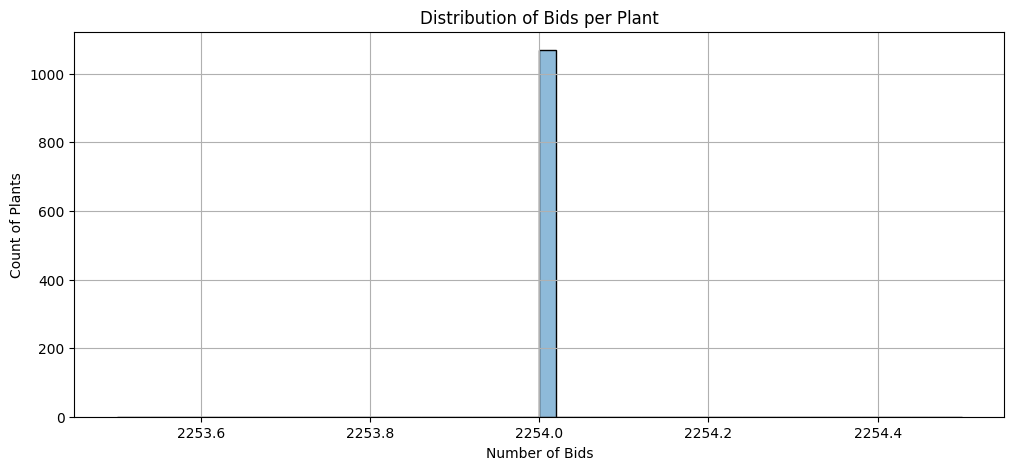

In [27]:
# Plot distribution of bids per plant
plt.figure(figsize=(12, 5))
sns.histplot(df_aggregated["total_bids"], bins=50, kde=True)
plt.xlabel("Number of Bids")
plt.ylabel("Count of Plants")
plt.title("Distribution of Bids per Plant")
plt.grid()
plt.show()



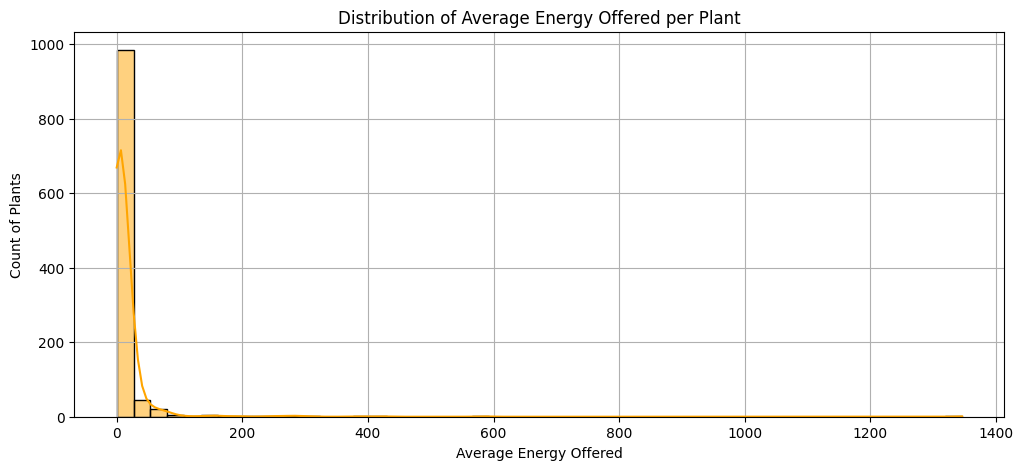

In [28]:
# Plot distribution of energy offered per plant

plt.figure(figsize=(12, 5))
sns.histplot(df_aggregated["avg_energy"], bins=50, kde=True, color="orange")
plt.xlabel("Average Energy Offered")
plt.ylabel("Count of Plants")
plt.title("Distribution of Average Energy Offered per Plant")
plt.grid()
plt.show()


### 2. df_filtered_cat


The unique values in the df are 

+ Categoria       2

+ Codigo       1297

In [29]:
df_filtered_cat.tail()  


,Categoria,Codigo
1292,Solar,WMVD209
1293,Solar,WMVD210
1294,Solar,WMVD211
1295,Solar,ZRMRE01
1296,Solar,ZRMRE03


In [30]:
df_filtered_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1297 entries, 0 to 1296
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Categoria  1297 non-null   object
 1   Codigo     1297 non-null   object
dtypes: object(2)
memory usage: 20.4+ KB


In [31]:
unique_categories = df_filtered_cat["Categoria"].unique()
category_counts = df_filtered_cat["Categoria"].value_counts()

print("Unique Categories:", unique_categories)
print("Category Counts:", category_counts)

Unique Categories: ['Eolica' 'Solar']
Category Counts: Categoria
Solar     923
Eolica    374
Name: count, dtype: int64


In [32]:
# Overview of Codigo entries

unique_codigos = df_filtered_cat["Codigo"].nunique()
duplicate_codigos = df_filtered_cat["Codigo"].duplicated().sum()

print("\nUnique Codigo Entries:", unique_codigos)
print("\nNumber of Duplicate Codigos:", duplicate_codigos)



Unique Codigo Entries: 1297

Number of Duplicate Codigos: 0


In [33]:
duplicates_df = df_filtered_cat[df_filtered_cat.duplicated(subset=["Codigo"], keep=False)]
print("Number of Duplicates:", duplicates_df.shape[0])

Number of Duplicates: 0


In [34]:

# codigo matching to a single category 

codigo_category_mapping = df_filtered_cat.groupby("Codigo")["Categoria"].nunique()
codigo_with_multiple_categories = codigo_category_mapping[codigo_category_mapping > 1]

# compare Codigo list in df_filtered_cat with df_omie_labelled

common_codigos = set(df_filtered_cat["Codigo"]).intersection(set(df_omie_labelled["Codigo"]))
missing_codigos_in_offers = set(df_filtered_cat["Codigo"]) - set(df_omie_labelled["Codigo"])
missing_codigos_in_filtered = set(df_omie_labelled["Codigo"]) - set(df_filtered_cat["Codigo"])


In [35]:
print("Codigos Mapping to Multiple Categories:", len(codigo_with_multiple_categories))
print("Common Codigos Between Both Datasets:", len(common_codigos))
print("Codigos in df_filtered_cat Missing in Offers:", len(missing_codigos_in_offers))
print("Codigos in df_omie_labelled Missing in df_filtered_cat:", len(missing_codigos_in_filtered))

Codigos Mapping to Multiple Categories: 0
Common Codigos Between Both Datasets: 1069
Codigos in df_filtered_cat Missing in Offers: 228
Codigos in df_omie_labelled Missing in df_filtered_cat: 0


####    Insights on Codigos 

+ No inconsistencies for each of the Codigo maps to a single Categoria (good data integrity).

+ Codigos in df_filtered_cat Missing in df_omie_labelled is 228. This means these plants may exist in the dataset but have no historical energy offers.

+  All Codigo from df_omie_labelled exist in df_filtered_cat (good coverage).

In [36]:
# If there are Codigo entries with multiple categories :- 

if not codigo_with_multiple_categories.empty:
    print("\nCodigos Mapping to Multiple Categories:")
    print(codigo_with_multiple_categories)

# Missing Codigo lists

if missing_codigos_in_offers:
    print("\nExample Codigos in df_filtered_cat Missing in df_omie_labelled:")
    print(list(missing_codigos_in_offers)[:10])

if missing_codigos_in_filtered:
    print("\nExample Codigos in df_omie_labelled Missing in df_filtered_cat:")
    print(list(missing_codigos_in_filtered)[:10])


Example Codigos in df_filtered_cat Missing in df_omie_labelled:
['IGVD208', 'GALVD38', 'AGRRE02', 'GSVD141', 'HCGVD1', 'CEVD442', 'EGPRE61', 'GACVD9', 'NXVD392', 'IBEVD23']


#### Insightz

+ Why are 228 Codigo from df_filtered_cat missing in df_omie_labelled?

+ Are these new plants that have not made any offers yet?

+ Are they inactive plants that used to make offers but stopped?


In [37]:
# check if these missing Codigos exist in another dataset

missing_codigos_df = df_filtered_cat[df_filtered_cat["Codigo"].isin(missing_codigos_in_offers)]
print(missing_codigos_df)

     Categoria   Codigo
41      Eolica  CEVD450
86      Eolica  EBLVD62
102     Eolica  EFGVD12
115     Eolica  EGPRE22
116     Eolica  EGPRE27
...        ...      ...
1286     Solar  WATRE16
1287     Solar  WATRE17
1292     Solar  WMVD209
1293     Solar  WMVD210
1294     Solar  WMVD211

[228 rows x 2 columns]


### 3. df_unit_list

In [38]:
df_unit_list.tail()

,Codigo,Descripción,Agente,Porcentaje_Propiedad,Tipo_Unidad,Zona/Frontera,Tecnología
3278,LAUCVX1,PORFOLIO VENTA COMER,"LA UNIÓN ELECTRO INDUSTRIAL, S.L.U.",100.0,PORFOLIO,ZONA ESPAÑOLA,Porfolio Comerc. Venta
3279,SECPCX1,PORTFOLIO BUY,SECOND FOUNDATION ENERGY AS,100.0,PORFOLIO,ZONA ESPAÑOLA,Porfolio Produccion Compra
3280,SECPVX1,PORTFOLIO SELL,SECOND FOUNDATION ENERGY AS,100.0,PORFOLIO,ZONA ESPAÑOLA,Porfolio Produccion Venta
3281,SWACCX1,SWACCX1,SWAP ENERGIA S.A,100.0,PORFOLIO,ZONA ESPAÑOLA,Porfolio Comerc. Compra
3282,SWACVX1,SWACVX1,SWAP ENERGIA S.A,100.0,PORFOLIO,ZONA ESPAÑOLA,Porfolio Comerc. Venta


In [39]:
df_unit_list.shape

(3283, 7)

In [40]:
df_unit_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3283 entries, 0 to 3282
Data columns (total 7 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Codigo                3283 non-null   object 
 1   Descripción           3283 non-null   object 
 2   Agente                3283 non-null   object 
 3   Porcentaje_Propiedad  3283 non-null   float64
 4   Tipo_Unidad           3283 non-null   object 
 5   Zona/Frontera         3283 non-null   object 
 6   Tecnología            3267 non-null   object 
dtypes: float64(1), object(6)
memory usage: 179.7+ KB


In [41]:
df_unit_list.describe().T

,count,mean,std,min,25%,50%,75%,max
Porcentaje_Propiedad,3283.0,99.72586,4.464146,1.0,100.0,100.0,100.0,100.0


In [42]:
print("\nRandom Sample of 5 Rows:")

df_unit_list.sample(5)


Random Sample of 5 Rows:


,Codigo,Descripción,Agente,Porcentaje_Propiedad,Tipo_Unidad,Zona/Frontera,Tecnología
2759,NXVD307,UOF SOLAR TARRAGON,NEXUS ENERGÍA (ACT. COMERCIALIZACIÓN RE),100.0,GENERACION,ZONA ESPAÑOLA,RE Mercado Solar Fotovoltáica
2736,NXVD282,UOF SOLAR SOLMURCIA,NEXUS ENERGÍA (ACT. COMERCIALIZACIÓN RE),100.0,GENERACION,ZONA ESPAÑOLA,RE Mercado Solar Fotovoltáica
110,CECAC01,COOP. ELECT. CASTELLAR,"COOPERATIVA ELECTRICA DE CASTELLAR, S.C.V.",100.0,COMERCIALIZADOR,ZONA ESPAÑOLA,Comercializador
218,EMELC01,EMELC01,ELÉCTRICA DE MELIANA,100.0,COMERCIALIZADOR,ZONA ESPAÑOLA,Comercializador
1483,EGVD058,AXPO VENTA R. ESPECIAL 058,"AXPO IBERIA, S.L.",100.0,GENERACION,ZONA ESPAÑOLA,RE Mercado Eólica


In [43]:
print("\nMissing Values per Column:")
print(df_unit_list.isnull().sum())


Missing Values per Column:
Codigo                   0
Descripción              0
Agente                   0
Porcentaje_Propiedad     0
Tipo_Unidad              0
Zona/Frontera            0
Tecnología              16
dtype: int64


In [44]:
# cat cols 
print("----------------------------------------------")


print("\nUnique Values in `Tipo_Unidad`:")
print(df_unit_list["Tipo_Unidad"].value_counts())

print("----------------------------------------------")


print("\nUnique Values in `Zona/Frontera`:")
print(df_unit_list["Zona/Frontera"].value_counts())

print("----------------------------------------------")


print("\nUnique Values in `Tecnología` (Including Missing):")
print(df_unit_list["Tecnología"].value_counts(dropna=False))

print("----------------------------------------------")


print("\nUnique Agentes Count:", df_unit_list["Agente"].nunique())
print("Top 10 Most Frequent Agentes:")
print(df_unit_list["Agente"].value_counts().head(10))


print("----------------------------------------------")

----------------------------------------------

Unique Values in `Tipo_Unidad`:
Tipo_Unidad
GENERACION                        2247
COMERCIALIZADOR                    664
CONSUMIDOR DIRECTO                 162
GENERICA                           120
PORFOLIO                            38
BOMBEO                              22
CONTRATO INTERNACIONAL              16
COMERCIALIZADOR ULTIMO RECURSO       7
DISTRIBUIDOR                         4
ALMACENAMIENTO                       3
Name: count, dtype: int64
----------------------------------------------

Unique Values in `Zona/Frontera`:
Zona/Frontera
ZONA ESPAÑOLA         3082
ZONA PORTUGUESA        139
FRONTERA FRANCIA        58
FRONTERA MARRUECOS       3
FRONTERA ANDORRA         1
Name: count, dtype: int64
----------------------------------------------

Unique Values in `Tecnología` (Including Missing):
Tecnología
RE Mercado Solar Fotovoltáica     864
RE Mercado Térmica no Renovab.    450
Comercializador                   419
RE Mercado 

In [45]:
unique_codigos = df_unit_list["Codigo"].nunique()
codigo_descripcion_duplicates = df_unit_list.duplicated(subset=["Codigo", "Descripción"]).sum()

print("\nUnique Codigo Count:", unique_codigos)
print("Duplicate Codigo-Descripcion Entries:", codigo_descripcion_duplicates)


Unique Codigo Count: 3274
Duplicate Codigo-Descripcion Entries: 9


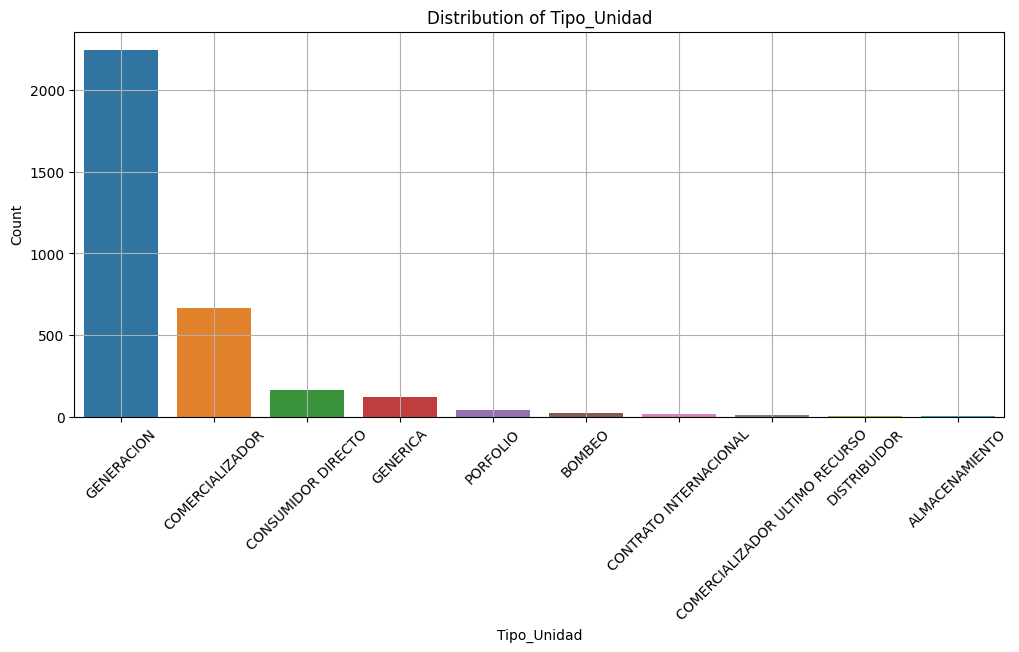

In [46]:
plt.figure(figsize=(12, 5))
sns.barplot(x=df_unit_list["Tipo_Unidad"].value_counts().index, 
            y=df_unit_list["Tipo_Unidad"].value_counts().values)
plt.xticks(rotation=45)
plt.xlabel("Tipo_Unidad")
plt.ylabel("Count")
plt.title("Distribution of Tipo_Unidad")
plt.grid()
plt.show()

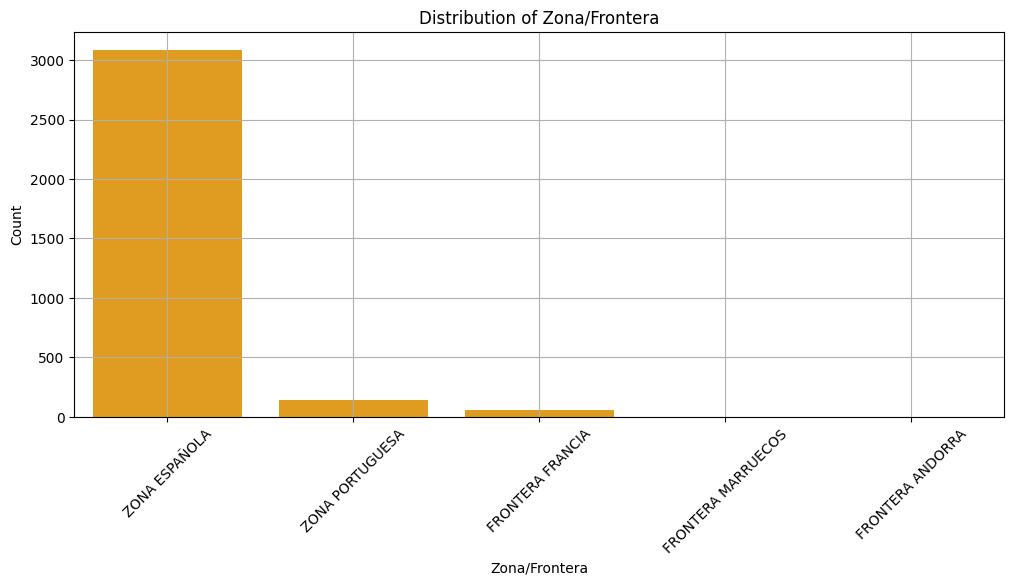

In [47]:
# Bar Chart - Zona/Frontera Counts

plt.figure(figsize=(12, 5))
sns.barplot(x=df_unit_list["Zona/Frontera"].value_counts().index, 
            y=df_unit_list["Zona/Frontera"].value_counts().values, color="orange")
plt.xticks(rotation=45)
plt.xlabel("Zona/Frontera")
plt.ylabel("Count")
plt.title("Distribution of Zona/Frontera")
plt.grid()
plt.show()



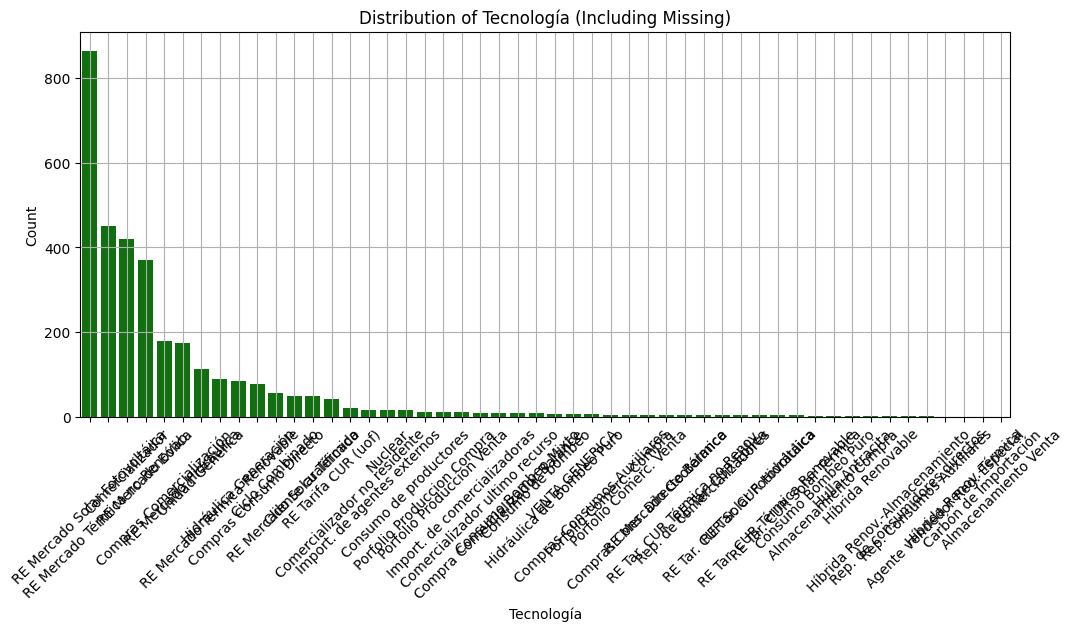

In [48]:
# Bar Chart - Tecnología Counts (Including Missing)
plt.figure(figsize=(12, 5))
sns.barplot(x=df_unit_list["Tecnología"].value_counts(dropna=False).index, 
            y=df_unit_list["Tecnología"].value_counts(dropna=False).values, color="green")
plt.xticks(rotation=45)
plt.xlabel("Tecnología")
plt.ylabel("Count")
plt.title("Distribution of Tecnología (Including Missing)")
plt.grid()
plt.show()


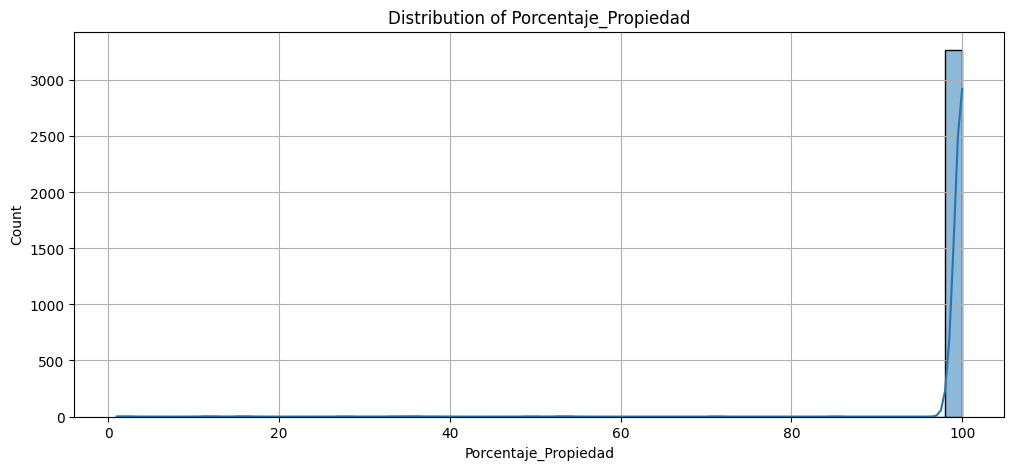

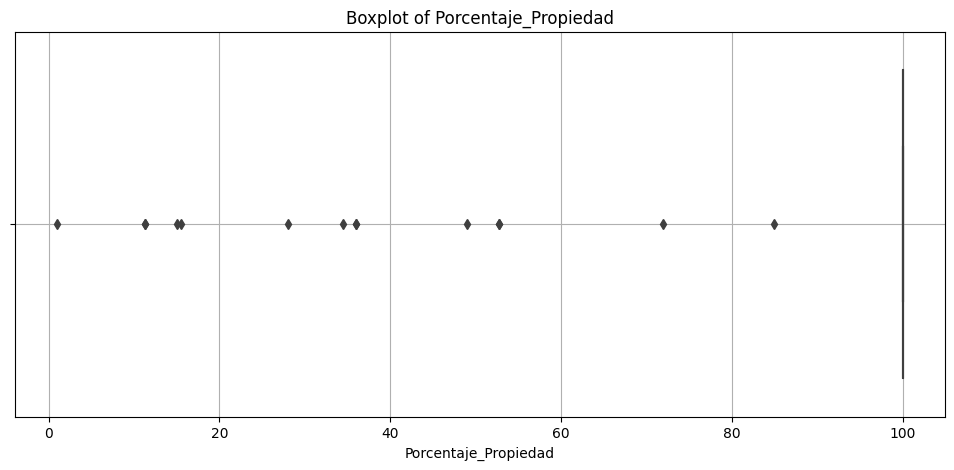

In [49]:
# Distribution n Boxplot of `Porcentaje_Propiedad`

plt.figure(figsize=(12, 5))
sns.histplot(df_unit_list["Porcentaje_Propiedad"], bins=50, kde=True)
plt.xlabel("Porcentaje_Propiedad")
plt.title("Distribution of Porcentaje_Propiedad")
plt.grid()
plt.show()

plt.figure(figsize=(12, 5))
sns.boxplot(x=df_unit_list["Porcentaje_Propiedad"])
plt.title("Boxplot of Porcentaje_Propiedad")
plt.grid()
plt.show()


# Feature Eng

### 1. df_omie_labelled

In [50]:
df_omie_labelled.shape

(2409526, 8)

### 1. Temp features

In [51]:
# Ensure that fechaHora is of datetime type
df_omie_labelled['fechaHora'] = pd.to_datetime(df_omie_labelled['fechaHora'])

# Day of the week (Monday=0, Sunday=6)
df_omie_labelled['day_of_week'] = df_omie_labelled['fechaHora'].dt.dayofweek

# Month (1-12)
df_omie_labelled['month'] = df_omie_labelled['fechaHora'].dt.month

# Day of the month (1-31)
df_omie_labelled['day_of_month'] = df_omie_labelled['fechaHora'].dt.day

df_omie_labelled['is_weekend'] = df_omie_labelled['day_of_week'].isin([5, 6]).astype(int)



In [52]:
## Cyclical Encodings for Hour and Day-of-Week:

# Transformations help the model capture the cyclic nature of time.

# For hour (0-23)

df_omie_labelled['hour_sin'] = np.sin(2 * np.pi * df_omie_labelled['hour'] / 24)
df_omie_labelled['hour_cos'] = np.cos(2 * np.pi * df_omie_labelled['hour'] / 24)

# For day-of-week (0-6)

df_omie_labelled['dow_sin'] = np.sin(2 * np.pi * df_omie_labelled['day_of_week'] / 7)
df_omie_labelled['dow_cos'] = np.cos(2 * np.pi * df_omie_labelled['day_of_week'] / 7)


In [53]:
## Interaction and Ratio Features

df_omie_labelled['energia_hour_sin'] = df_omie_labelled['Energia'] * df_omie_labelled['hour_sin']

df_omie_labelled['cum_energy'] = df_omie_labelled.groupby(['Codigo', 'date'])['Energia'].cumsum()

In [54]:
## check missing values

missing_values = df_omie_labelled.isnull().sum()
print("Missing Values:\n", missing_values)

missing_percentage = (df_omie_labelled.isnull().sum() / len(df_omie_labelled)) * 100
print("\nPercentage of Missing Values:\n", missing_percentage)


Missing Values:
 Codigo              0
Descripcion         0
fechaHora           0
PrecEuro            0
Energia             0
date                0
hour                0
week                0
day_of_week         0
month               0
day_of_month        0
is_weekend          0
hour_sin            0
hour_cos            0
dow_sin             0
dow_cos             0
energia_hour_sin    0
cum_energy          0
dtype: int64

Percentage of Missing Values:
 Codigo              0.0
Descripcion         0.0
fechaHora           0.0
PrecEuro            0.0
Energia             0.0
date                0.0
hour                0.0
week                0.0
day_of_week         0.0
month               0.0
day_of_month        0.0
is_weekend          0.0
hour_sin            0.0
hour_cos            0.0
dow_sin             0.0
dow_cos             0.0
energia_hour_sin    0.0
cum_energy          0.0
dtype: float64


In [55]:
df_omie_labelled.columns

Index(['Codigo', 'Descripcion', 'fechaHora', 'PrecEuro', 'Energia', 'date',
       'hour', 'week', 'day_of_week', 'month', 'day_of_month', 'is_weekend',
       'hour_sin', 'hour_cos', 'dow_sin', 'dow_cos', 'energia_hour_sin',
       'cum_energy'],
      dtype='object')

### 2. df_filtered_cat

In [56]:
df_filtered_cat.columns

Index(['Categoria', 'Codigo'], dtype='object')

### 3. df_unit_list

In [57]:
df_unit_list['Tecnología'] = df_unit_list['Tecnología'].fillna('Unknown')
